# Rozdział 9.1 Zadanie Baza filmów

#### Import bibliotek i wczytanie danych z plików

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
film_base = pd.read_csv('tmdb_movies.csv')
film_genres = pd.read_csv('tmdb_genres.csv')

## Zadanie 1 

In [6]:
film_base_temp = film_base

#### Przypisanie do film_vote_count_3q jedynie filmów powyżej 3 kwartyla

In [8]:
film_vote_count_3q = film_base_temp.loc[film_base_temp['vote_count'] >= film_base_temp['vote_count'].quantile(0.75)]

#### Sortowanie filmów powyżej 3 kwartyla pod kątem średniej wartości oceny i wyświetlenie wyników dla pierwszych 10 filmów

In [10]:
film_vote_count_3q_sorted = film_vote_count_3q.sort_values(by='vote_average',ascending=False)
film_vote_count_3q_sorted[['title','vote_average','vote_count']].head()

,title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
2294,Spirited Away,8.3,3840
3865,Whiplash,8.3,4254
2731,The Godfather: Part II,8.3,3338


## Zadanie 2 

#### By móc dzialać na datach, najpierw trzeba sprawdzić czy w kolumnie znajdują się jakieś wpisy NaN

In [13]:
table_revenue_budget = film_base[['original_title','release_date','revenue','budget']]

In [14]:
table_revenue_budget[table_revenue_budget['release_date'].isnull()]

,original_title,release_date,revenue,budget
4553,America Is Still the Place,NaN,0,0


#### Znajdują się takowe wpisy więc je usuwamy

In [16]:
table_revenue_budget=table_revenue_budget.dropna()

#### do date_temp przypisujemy rok opublikowania filmu a nastepnie ten rok wpisujemy do pierwotnej DF table_revenue_budget jako nowa kolumna

In [18]:
date_temp = pd.to_datetime(table_revenue_budget['release_date']).dt.year
table_revenue_budget['year']= date_temp
table_revenue_budget.drop(['original_title','release_date'],axis=1,inplace=True)
table_revenue_budget.sample(10)

,revenue,budget,year
1143,117487473,65000000,2001
1437,0,30000000,2012
322,263920180,90000000,1997
4530,0,0,2002
4452,0,800000,2011
896,72779000,51000000,2006
3869,0,0,2006
1199,120175290,40000000,2006
3958,3387000,3000000,2015
676,25052000,63000000,1994


In [19]:
table_revenue_budget = table_revenue_budget[((table_revenue_budget['year']>=2010) & (table_revenue_budget['year']<=2016))]

In [20]:
table_revenue_budget = table_revenue_budget.groupby('year').mean()

In [21]:
table_revenue_budget = table_revenue_budget.sort_values(by='year',ascending=True)
table_revenue_budget.head()

,revenue,budget
year,,
2010,9.043811e+07,3.449541e+07
2011,9.200413e+07,3.477232e+07
2012,1.160659e+08,3.492203e+07
2013,1.013485e+08,3.552329e+07
2014,1.013466e+08,3.095989e+07


#### Przygotowanie danych do wyświetlania w postaci wykresów

In [23]:
budget = np.asarray(table_revenue_budget.iloc[:,1])
revenue = np.asarray(table_revenue_budget.iloc[:,0])
index = np.asarray(table_revenue_budget.index)

#### Przygotowanie wykresu zgodnie z wytycznymi zadania

Text(0.5, 1.0, 'Średni przychód i budżet filmu w latach 2010-2016')

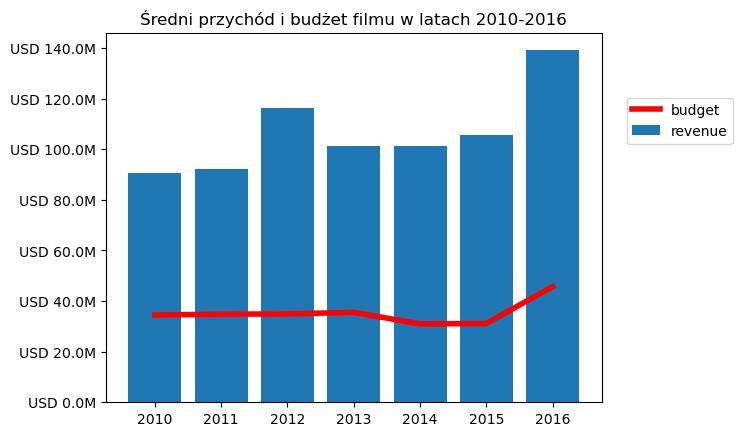

In [25]:
def million(x, pos):
        return 'USD {:2.1f}M'.format(x*1e-6)
fig, ax = plt.subplots()
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(plt.MultipleLocator(20e6))
ax.bar(index, revenue,label='revenue')
ax.plot(index, budget, label='budget', color='red',linewidth=4,)
ax.legend(loc=(1.05,0.7))
ax.set_title('Średni przychód i budżet filmu w latach 2010-2016')

## Zadanie 3

#### wczytanie pierwotnych danych do zmiennych

In [28]:
film_base_temp = film_base
film_genres_temp = film_genres

#### Zmiana nazwe kolumy w film genres by możliwa była operacja merge na określonym kluczu

In [30]:
film_genres_temp=film_genres_temp.rename(columns={'Unnamed: 0':'genre_id'})
film_base_genres_runtime = pd.merge(film_base_temp,film_genres_temp,how='inner',on='genre_id')

#### Wyświetlenie wyniku powyższej operacji - dodano kolumne genres

In [32]:
film_base_genres_runtime.iloc[:1,8:]

,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action


## Zadanie 4 

#### Tabele z poprzedniego zadania posłuzy do wyekstrahowania kolumny genres. Nastepnie wykonujemy na niej liczenie poszczegolnych ilości. Na końcu sortujemu

In [35]:
most_common_genre = film_base_genres_runtime[['genres']]
most_common_genre = most_common_genre.value_counts().sort_values(ascending=False)

#### Drukujemy odpowiedź

In [37]:
print("Gatunek który najczęściej pojawia się w bazie to:",most_common_genre.index[0],"\nFilmów tego gatunku jest",most_common_genre.iloc[0],"w bazie danych")

Gatunek który najczęściej pojawia się w bazie to: ('Drama',) 
Filmów tego gatunku jest 1207 w bazie danych


## Zadanie 5

In [39]:
genre_longest_runtime = film_base_genres_runtime[['genres','runtime']].dropna()
genre_longest_runtime=genre_longest_runtime.groupby('genres').mean()
genre_longest_runtime.head()

,runtime
genres,
Action,109.058355
Adventure,113.061947
Animation,89.552846
Comedy,100.464491
Crime,112.143590


#### Sortujemy tabelę i drukujemy odpowiedź na pytanie z zadania 5

In [41]:
genre_longest_runtime.sort_values(ascending=False, by='runtime',inplace=True)
print("Najdłużej średnio twały filmy z gatunku:",genre_longest_runtime.index[0],"\nFilm z tego gatunku trwał średnio:",genre_longest_runtime.iloc[0,0])

Najdłużej średnio twały filmy z gatunku: History 
Film z tego gatunku trwał średnio: 133.96


## Zadanie 6

#### Znów odwołujemy się do tabaeli z końca zadania 3, tym razem, bedziemy potrzbować danych z kolumn 'genres','runtime','title, czyścimy dane z wpisów NaN

In [44]:
longest_movies = film_base_genres_runtime[['genres','runtime','title']].dropna()

#### Filtrujemy dane po kategorii która była wynikiem poprzedniego zadania i przygotowujemy histogram

In [46]:
longest_movies = longest_movies[(longest_movies['genres']==genre_longest_runtime.index[0])]

Text(0.5, 1.0, 'Hisogram czasu trwania filmów z gatunku o najdłuższym średnim czasem trwania')

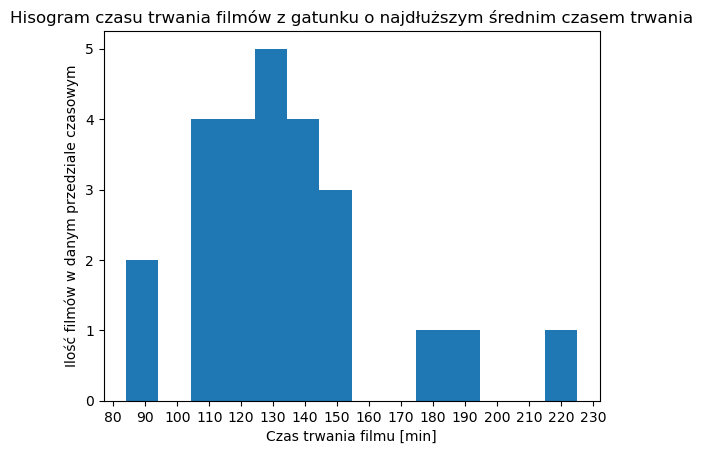

In [47]:
fig, ax = plt.subplots()
longest_movies.iloc[:,1].plot(kind='hist',bins=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(17))
ax.set_xlabel('Czas trwania filmu [min]')
ax.set_ylabel('Ilość filmów w danym przedziale czasowym')
ax.set_title('Hisogram czasu trwania filmów z gatunku o najdłuższym średnim czasem trwania')